数据集信息:
样本数量: 20640
特征数量: 8

特征名称:
MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude
模型评估结果：
均方误差 (MSE): 0.5559
均方根误差 (RMSE): 0.7456
决定系数 (R²): 0.5758

模型参数：
截距: 2.0719
特征系数:
MedInc: 0.8544
HouseAge: 0.1225
AveRooms: -0.2944
AveBedrms: 0.3393
Population: -0.0023
AveOccup: -0.0408
Latitude: -0.8969
Longitude: -0.8698


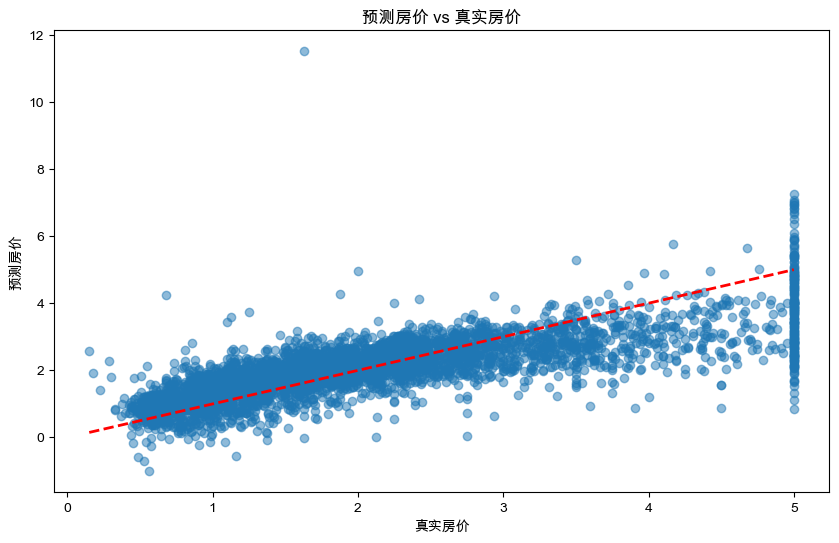

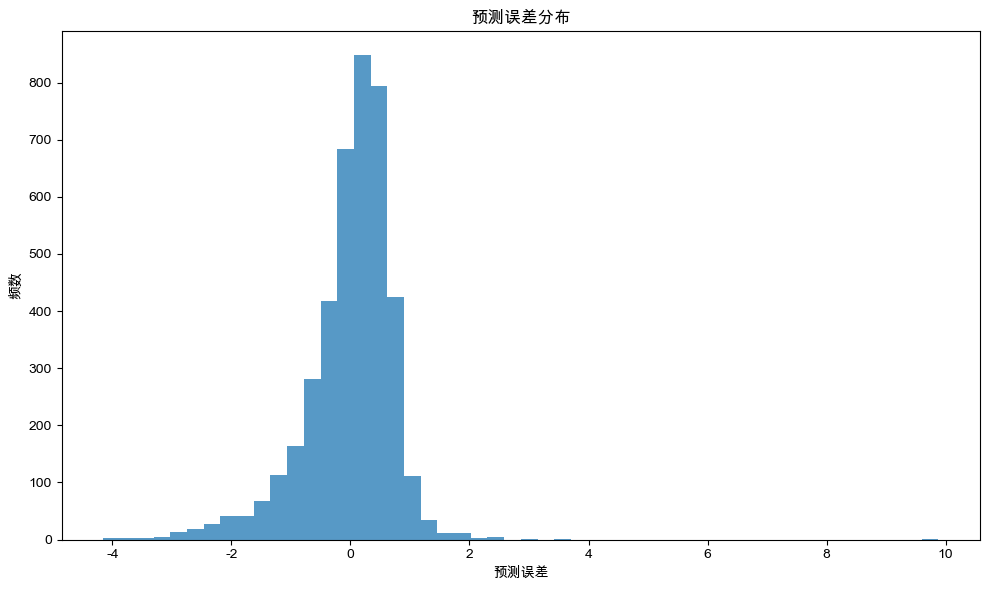

In [23]:
# 导入必要的库
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import os

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home = './data')
X = housing.data
y = housing.target
# 检查数据集是否存在缺失值
print("数据集信息:")
print(f"样本数量: {X.shape[0]}")
print(f"特征数量: {X.shape[1]}")
print("\n特征名称:")
for feature in housing.feature_names:
    print(feature)

# # 检查缺失值
# missing_values = np.isnan(X).sum()
# print("\n各特征缺失值数量:")
# for feature, missing in zip(housing.feature_names, missing_values):
#     print(f"{feature}: {missing}") #要求为迭代器类型    

# # 检查异常值
# print("\n数据集基本统计信息:")
# for i, feature in enumerate(housing.feature_names):
#     print(f"\n{feature}:")
#     print(f"最小值: {X[:, i].min():.4f}")
#     print(f"最大值: {X[:, i].max():.4f}")
#     print(f"平均值: {X[:, i].mean():.4f}")
#     print(f"标准差: {X[:, i].std():.4f}")

# 由于该数据集经过预处理，实际上没有缺失值
# 如果有缺失值，可以使用以下方法处理:
# 1. 使用平均值填充
# X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))
# 2. 删除包含缺失值的样本
# mask = ~np.isnan(X).any(axis=1)
# X = X[mask]
# y = y[mask]


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 创建并训练线性回归模型
# 创建线性回归模型并设置合适的参数
model = LinearRegression(
    fit_intercept=True,  # 是否计算截距
    copy_X=True,  # 是否复制X
    n_jobs=-1,  # 使用所有CPU核心进行并行计算
    positive=False  # 是否强制系数为正
)
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("模型评估结果：")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 打印模型参数
print("\n模型参数：")
print(f"截距: {model.intercept_:.4f}")
print("特征系数:")
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

# 设置matplotlib支持中文显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建预测值与真实值对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('预测房价 vs 真实房价')


# 创建预测误差分布图
errors = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.75)
plt.xlabel('预测误差')
plt.ylabel('频数')
plt.title('预测误差分布')
plt.tight_layout()
plt.show()



In [24]:
# 导入模型保存相关的库
# 保存模型和标准化器
model_path = './models/california_housing_model.pkl'
scaler_path = './models/california_housing_scaler.pkl'

# 创建models目录（如果不存在）
if not os.path.exists('./models'):
    os.makedirs('./models')

# 保存模型
joblib.dump(model, model_path)
print(f"模型已保存至: {model_path}")

# 保存标准化器
joblib.dump(scaler, scaler_path)
print(f"标准化器已保存至: {scaler_path}")

# 演示如何加载模型和标准化器
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
print("\n模型和标准化器加载成功")

模型已保存至: ./models/california_housing_model.pkl
标准化器已保存至: ./models/california_housing_scaler.pkl

模型和标准化器加载成功


In [27]:
import joblib

# 加载保存的模型和标准化器
model = joblib.load('./models/california_housing_model.pkl')
scaler = joblib.load('./models/california_housing_scaler.pkl')

# # 准备要预测的数据样本
# # 这里假设我们有一个新的房屋数据样本
# #new_house = X_test[-1].reshape(1, -1)# 将数据样本转换为二维数组
# new_house_data=X_test[[-1],:]
# # 使用保存的标准化器对新数据进行标准化
# new_house_scaled = scaler.transform(new_house)

new_house_data=X_test[[-1],:] 
# 对新数据进行标准化
new_house_data_scaled = loaded_scaler.transform(new_house_data) 

# 使用模型进行预测
predicted_price = model.predict(new_house_scaled)
print(type(predicted_price))
print(f'预测的房屋价格为: {predicted_price[0]:,.2f}')


# 对整个测试集进行预测
X_test_scaled = loaded_scaler.transform(X_test)
y_pred = loaded_model.predict(X_test_scaled)

# 评估模型性能
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 计算均方误差(MSE)
mse = mean_squared_error(y_test, y_pred)


print("\n模型评估指标:")
print(f"均方误差 (MSE): {mse:.4f}")

<class 'numpy.ndarray'>
预测的房屋价格为: -37.12

模型评估指标:
均方误差 (MSE): 0.5559


In [26]:
predicted_price


array([-37.11509378])